In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('Date_Fruit_Datasets.csv')
x = data.iloc[:,:-1]
y = data['Class']

In [3]:
aboost = AdaBoostClassifier(n_estimators=50)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)
aboost.fit(x_train,y_train)

AdaBoostClassifier()

Accuracy: 0.7481481481481481


[Text(0.5, 0.75, 'x[16] <= 67.257\ngini = 0.83\nsamples = 628\nvalue = [0.076, 0.108, 0.231, 0.075, 0.185, 0.22, 0.105]'),
 Text(0.25, 0.25, 'gini = 0.07\nsamples = 137\nvalue = [0.0, 0.0, 0.0, 0.008, 0.0, 0.21, 0.0]'),
 Text(0.75, 0.25, 'gini = 0.803\nsamples = 491\nvalue = [0.076, 0.108, 0.231, 0.067, 0.185, 0.01, 0.105]')]

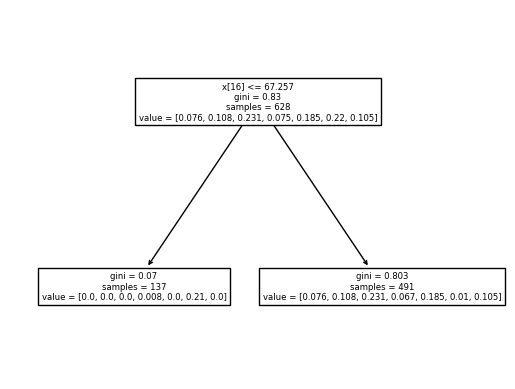

In [4]:
y_pred = aboost.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
tree.plot_tree(aboost[0])

In [5]:
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print("Confusion matrix : \n",cm)
print("Accuracy : ",acc)

Confusion matrix : 
 [[ 4  0  0  8  5  0  0]
 [ 0  0  5  0  0  0 25]
 [ 0  0 55  0  0  0  4]
 [ 4  0  0 17  4  0  0]
 [ 0  0  0  0 47  0  3]
 [ 1  0  0  0  2 55  3]
 [ 1  0  0  0  3  0 24]]
Accuracy :  0.7481481481481481


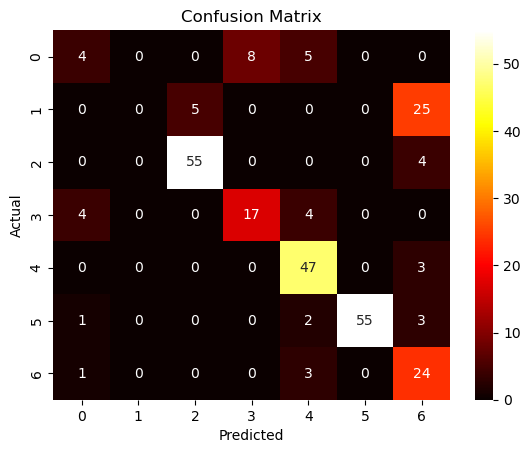

In [6]:
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="hot")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()